In [1]:
import pickle

with open('ratios.pkl', 'rb') as f:
    ratios = pickle.load(f)

with open('ppls.pkl', 'rb') as f:
    ppls = pickle.load(f)

In [2]:
import matplotlib.pyplot as plt

from matplotlib.cm import ScalarMappable, viridis_r
from matplotlib.colors import Normalize
from matplotlib.ticker import *

from scipy.optimize import curve_fit

In [3]:
def func(s, A, C, a):
    return A / s**a + C

def plot(domain):
    names = ratios.keys()
    rd = [ratios[name][domain] for name in names]
    
    norm = Normalize(vmin=min(rd), vmax=max(rd))
    mappable = ScalarMappable(norm=norm, cmap=viridis_r)

    fig, ax = plt.subplots()
    for name, r in zip(names, rd):
        data = ppls[name]
        x = data['global_step']
        y = data[domain]
        dot, = ax.plot(x, y, 'o', color=mappable.to_rgba(r), label=name)

        scaled_x = x / 10000
        popt, pcov = curve_fit(func, xdata=scaled_x, ydata=y)
        fitted_y = func(scaled_x, *popt)
        ax.plot(x, fitted_y, ':', color=dot.get_color())
    
    cbar = fig.colorbar(mappable, ax=ax)
    cbar.set_label('Domain Proportion')

    ax.set_yscale('log')
    ax.set_xscale('log')

    ax.set_xlabel('Training Steps')
    ax.set_ylabel('Validation Loss')
    ax.set_title(domain)


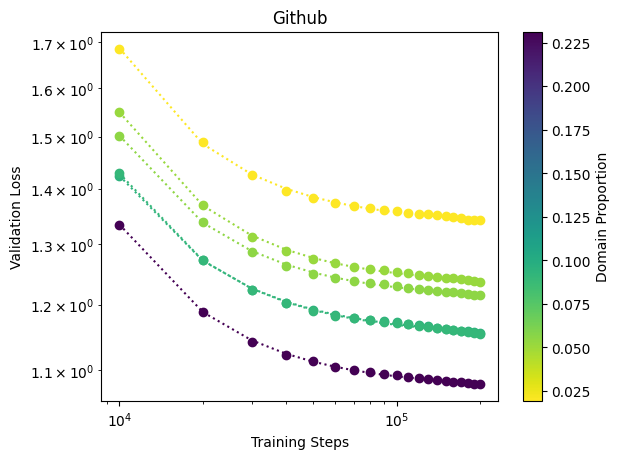

In [4]:
plot('Github')